In [44]:
import numpy as np
import pandas as pd
from math import sqrt
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
# data = pd.read_csv('/Users/yashwanthkaruparthi/Documents/Documents1/acad/sem7/design project EEE F337/implement/sample/BiLSTM_solar_weather/solar_weather copy.csv')

# data = pd.read_csv('/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae_data_2022.csv', header=0, infer_datetime_format=True, parse_dates=['Time'], index_col=['Time'])

data = pd.read_csv('/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae_nrel_data.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [46]:
# data = data.drop(index=0).reset_index(drop=True)


In [47]:
data.head()

,Temperature,DNI,DHI,GHI,Pressure,Wind Speed,Datetime
0,21.6,0,0,0,1021,1.9,2018-01-01 00:30:00
1,21.3,0,0,0,1021,1.9,2018-01-01 01:30:00
2,21.1,0,0,0,1021,1.9,2018-01-01 02:30:00
3,20.8,0,0,0,1021,1.9,2018-01-01 03:30:00
4,20.0,0,0,0,1016,0.8,2018-01-01 04:30:00


In [48]:
# data.columns = data.iloc[0]  # Assign the first row as column names
# data = data[1:].reset_index(drop=True)  # Remove the first row and reset the index

In [49]:
# data.columns = data.iloc[0]  # Assign the first row as column names
# data = data[1:].reset_index(drop=True)  # Remove the first row and reset the index

In [50]:
data.head()

,Temperature,DNI,DHI,GHI,Pressure,Wind Speed,Datetime
0,21.6,0,0,0,1021,1.9,2018-01-01 00:30:00
1,21.3,0,0,0,1021,1.9,2018-01-01 01:30:00
2,21.1,0,0,0,1021,1.9,2018-01-01 02:30:00
3,20.8,0,0,0,1021,1.9,2018-01-01 03:30:00
4,20.0,0,0,0,1016,0.8,2018-01-01 04:30:00


In [51]:
# data['Datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])


In [52]:
# data = data.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])

# Set Datetime as the index



In [53]:
columns_to_keep = ['Temperature', 'DNI', 'DHI', 'GHI', 'Pressure', 'Wind Speed', 'Datetime']

# Filter the dataset to keep only the desired columns
data = data[columns_to_keep]

In [54]:
# data.to_csv('/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae_data_2022.csv', index=False)


In [55]:
data.head()

,Temperature,DNI,DHI,GHI,Pressure,Wind Speed,Datetime
0,21.6,0,0,0,1021,1.9,2018-01-01 00:30:00
1,21.3,0,0,0,1021,1.9,2018-01-01 01:30:00
2,21.1,0,0,0,1021,1.9,2018-01-01 02:30:00
3,20.8,0,0,0,1021,1.9,2018-01-01 03:30:00
4,20.0,0,0,0,1016,0.8,2018-01-01 04:30:00


In [56]:
# data = pd.read_csv('/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae_data_2022.csv')

In [57]:
data = data.set_index('Datetime')

In [58]:
data.index = pd.to_datetime(data.index)


In [59]:
data.index = pd.to_datetime(data.index)


In [60]:
year = 2022
data_2022 = data[data.index.year == year]

In [61]:
data_2022.tail()

,Temperature,DNI,DHI,GHI,Pressure,Wind Speed
Datetime,,,,,,
2022-12-31 19:30:00,21.7,0,0,0,1025,3.3
2022-12-31 20:30:00,21.4,0,0,0,1025,2.9
2022-12-31 21:30:00,21.2,0,0,0,1025,2.5
2022-12-31 22:30:00,21.0,0,0,0,1024,2.2
2022-12-31 23:30:00,21.0,0,0,0,1024,1.8


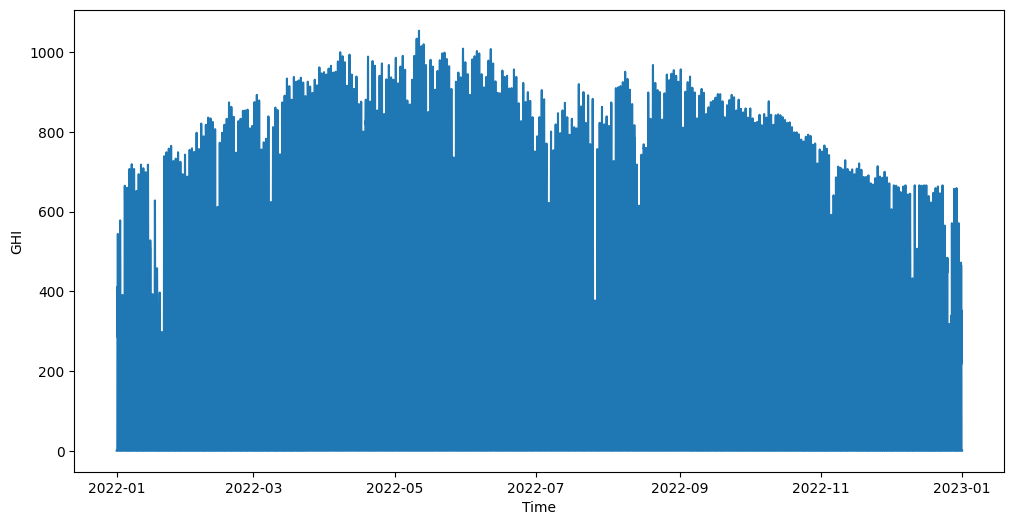

In [73]:
# data_2021 = data.loc['2022']

# plt.plot(data_2022.index, data_2022["GHI"])
# plt.xlabel("Time")
# plt.ylabel("GHI")
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(data_2022.index, data_2022['GHI'], label='GHI', color='royalblue')
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Date')
# plt.ylabel('GHI')
# plt.title(f'GHI Data for the Year {year}')
# # plt.ylim(min(data['GHI']) - 10, max(data['GHI']) + 10)
# plt.legend()
# plt.show()


plt.figure(figsize=(12, 6))
plt.plot(data_2022.index, data_2022['GHI'])
plt.xlabel("Time")
plt.ylabel("GHI")
plt.show()

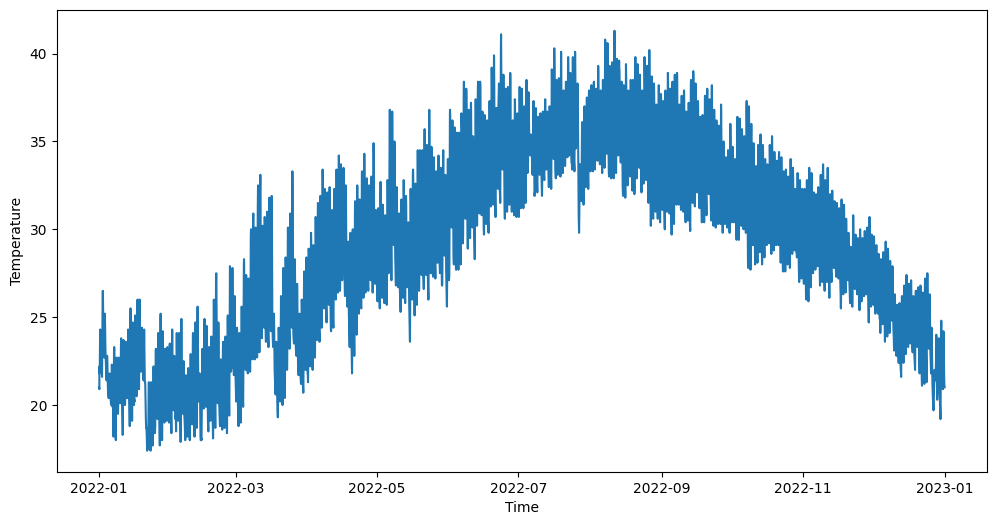

In [75]:
# data_2021 = data.loc['2022']

# plt.plot(data_2022.index, data_2022["GHI"])
# plt.xlabel("Time")
# plt.ylabel("GHI")
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(data_2022.index, data_2022['Temperature'], label='Temperature', color='blue')
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.title(f'Temperature Data for the Year {year}')
# # plt.ylim(min(data['GHI']) - 10, max(data['GHI']) + 10)
# plt.legend()
# plt.show()


plt.figure(figsize=(12, 6))
plt.plot(data_2022.index, data_2022['Temperature'])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

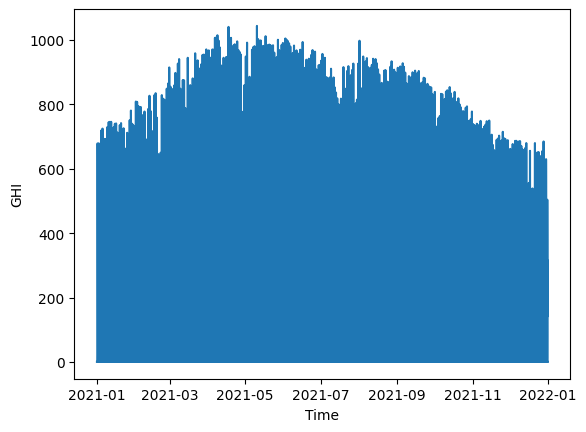

In [64]:
data_2021 = data.loc['2021']

plt.plot(data_2021.index, data_2021["GHI"])
plt.xlabel("Time")
plt.ylabel("GHI")
plt.show()

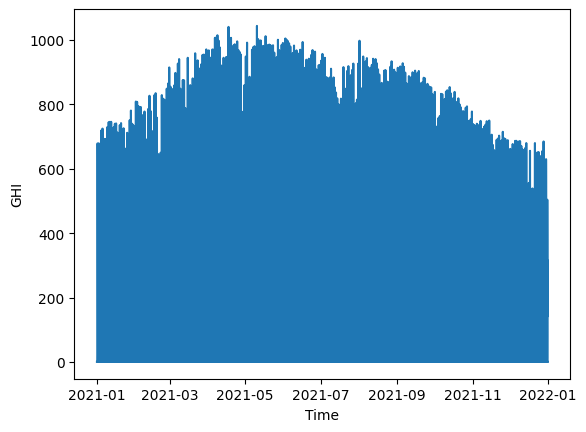

In [65]:
data_2021 = data.loc['2021']

plt.plot(data_2021.index, data_2021["GHI"])
plt.xlabel("Time")
plt.ylabel("GHI")
plt.show()

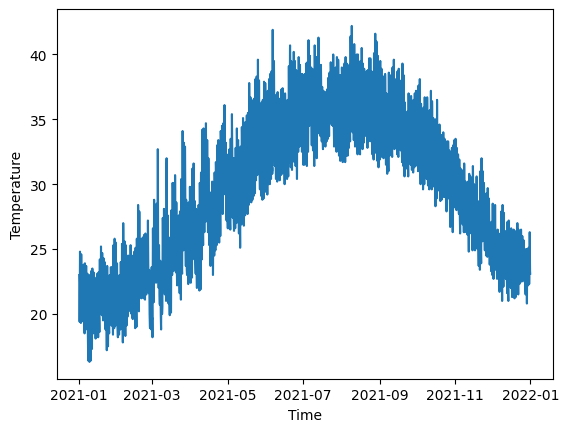

In [ ]:
data_2021 = data.loc['2021']

plt.plot(data_2021.index, data_2021["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

### Observations

- 6, 7, 8 are peak summer months
- march, april, may is when the temperature starts rising -> spring season
- temperature starts dropping during september and october -> autumn season
- Nov, Dec, Jan, Feb are winters in the chosen region
- looking at the range of temperature fluctuations between seasons, it should be a cold region

In [67]:
data = data[(data.index.month.isin([6, 7, 8])) & (data.index.year == 2021)]

/var/folders/n5/mlsmdgns0kqfybw1r9qm4n5w0000gp/T/ipykernel_3518/1294752704.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(file_dir, header=0, infer_datetime_format=True, parse_dates=['Time'], index_col=['Time'])


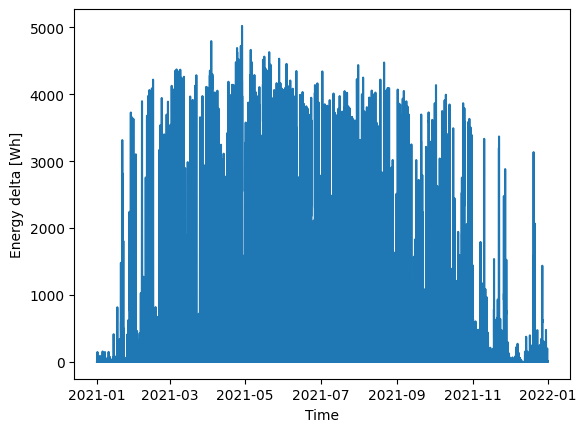

In [68]:
file_dir = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/solar_weather copy 2.csv'

data = pd.read_csv(file_dir, header=0, infer_datetime_format=True, parse_dates=['Time'], index_col=['Time'])

from sklearn.preprocessing import MinMaxScaler

data = data[(data.index.year == 2021)]

dataset = data[['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

data_2021 = data.loc['2021']

plt.plot(data_2021.index, data_2021["Energy delta[Wh]"])

plt.xlabel("Time")
plt.ylabel("Energy delta [Wh]")
plt.show()